# DD2424 Deep Learning in Data Science
## Assignment 4

### Imports

In [1]:
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install tqdm

In [2]:
# import numpy as np
from data import *
from utils import *
from rnn_ import RNN

### Load data

In [3]:
data = load_and_process_text("goblet_book.txt")
book_data = data['book_data']
char_2_indices = data['char_2_indices']
indices_2_char = data['indices_2_char']

## Exercise 1
Implement and train a vanilla RNN

##### Synthesize text

In [4]:
rnn = RNN(80, 80, hidden_size=10, char_2_indices=char_2_indices, indices_2_char=indices_2_char)
output = rnn.generate()
output

'JiLI9,IQUBXJm6:UDu/wO"^,j2Ek-pvOJermK.F1p7^^/u,"I7xz\n.LS\'•"olv7eK,IvahoRGRiqxBqC7rc;U6td_q/;Cl9b1uYOk0P)qOgoFFZSUs2ho^4W\nVes;Jtr•AnWDN,Hqp(_(FCM9Mq3e6XyeDjl\nbfI3b7FCwVJHe,lüYFD^P\'ueQs-d}\tRIOpLBL("wRG\''

##### Implement forward pass

In [5]:
seq_length = 25

x_chars = index_2_one_hot(np.array(chars_2_indices(book_data[:seq_length], char_2_indices)), 80)
y_chars = index_2_one_hot(np.array(chars_2_indices(book_data[1:seq_length + 1], char_2_indices)), 80)

In [6]:
loss = rnn.forward(x_chars, y_chars, np.zeros(shape=(10, 1)))

In [7]:
gradients = rnn.backward(x_chars, y_chars)

In [8]:
gradients_num = rnn.compute_gradients_num(x_chars, y_chars)

In [9]:
for grad in gradients:
    print(gradients[grad].shape, gradients_num[grad].shape)

(10, 10) (10, 10)
(10, 80) (10, 80)
(10, 1) (10, 1)
(80, 10) (80, 10)
(80, 1) (80, 1)


In [10]:
equal = True
threshold = 0

for grad in ['W']:
    equal = equal and np.allclose(gradients[grad], gradients_num[grad], rtol=1e-6, atol=1e-6)    
    threshold = max(threshold, np.max(np.abs(gradients[grad] - gradients_num[grad])))

print(equal)
print(threshold)

True
2.882810382553655e-10


In [11]:
losses = rnn.fit(book_data, iterations=100_001, verbose=10_000)

Update step 0 with loss: 109.55008548298976
Generated text:
y7r3y?DYas S!C0lNpI7bZ•B3YPStk6uS6 EjBOxe_pa7(:O_660ü müjvR^9)MsnkmshYRVPW•aVQV)Wu1ück,HoJATATOJfYX:1"'yOgj6;Ph":N(jh_)U}R}xlaBtVwE13H	A^bLOg_F•I(^E-v-Y/idi}qKP
NNlse2fl_o^
tLrulN^cOL4N,G1ZC:7b!AatB'V



Update step 10000 with loss: 58.02697768935086
Generated text:
ut Hart .T he her Frlederund go in'r whaed thhu mifmarged lowcy soney ares and Dlor morer teep als Me the upats amt, urregund Peund,.
"Hat blechh laad, we'n norold Ron wostse ut ."  Ite - qougbelr, an



Update step 20000 with loss: 56.407827940348895
Generated text:
ack, fo the feir," fich shoust Supant thigount thaked thaw. ' hem sa touled wis of tiwast mere an gat ar?" tory tlerFy lang sud, Hars thingtm, thousn asil henteng wamd wadr ant wamd wis vobliuy, brit,



Update step 30000 with loss: 55.887276093181235
Generated text:
ly and tore samred arlous by the reto  of hing co talt wed.  qocche haole,  Ham uwent ther, padrem.  She fored, Ster" sorly here atle spe

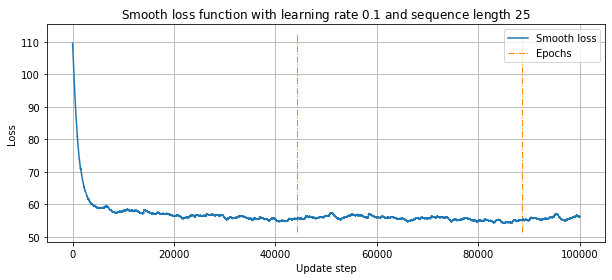

In [12]:
iterations_per_epoch = len(book_data) // 25
plot_smooth_loss(losses, r'Smooth loss function with learning rate $0.1$ and sequence length $25$', iterations_per_epoch)

In [13]:
big_losses = rnn.fit(book_data, iterations=300_001)

In [14]:
rnn.generate(x0=x_chars[:,[0]], seq_length=1000)

'e hat on hann siintar whee cnorinsid rarny olesol, driacked dyin Hain ap is thioud dove theves baprnely, the wis feloot and thes Brasin so Fard cumatey thoulf lel in quarloy, fint," hel bindu sne meondong wes Ros delacjulf a alpraidren Pooed yory nounsen," lenked for he warrizn. . you sneror and seasout Ung zhe wlou."\n"Yourd seasgheviny so jonn, ond im thet!" Haouny - dertenh sar, the solell, Croumshh, there as of a ricout he lookt."\n"Dlliggoy.\n"Cararted hrony an the my"d younciund gat.\n"We ant a he\neage andep he coudf," he thounizy, mesiy.\nSvered" . Void-ougery bersede tof ner hel ire whin, was!  "Has, los friwnond wo incthe boundem-erh Hamud.\n""Whad Thes filised a velfy the corce Rin, satt, gre lud owe ilding thasciand were tfute the gof- haud, satl. . fedn sartted of the thist. Ry onloy foicmitone Pank, thay mrerlly you yas hand het hander seall hin scoh thawt etn "The\'s Hes Hapw thof hired bostibd let she tovimed.  Harry Mren olore nat chid ece cto, ablhem kttaum; wa it . 

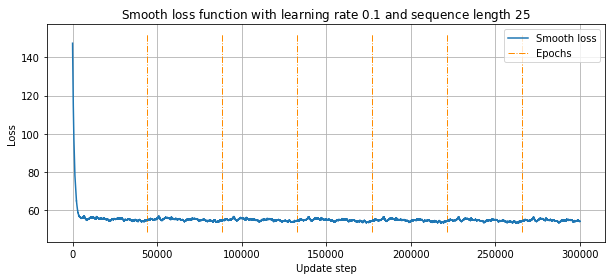

In [16]:
plot_smooth_loss(big_losses, r'Smooth loss function with learning rate $0.1$ and sequence length $25$', iterations_per_epoch)